In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('Cleaned_Dataset.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
encoder = LabelEncoder()
for i in df.columns:
    if isinstance(df[i][0], str):
        df[i] = encoder.fit_transform(df[i])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052


In [4]:
X = df.drop(['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Outlet_Establishment_Year','Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)

In [5]:
br = BaggingRegressor(n_estimators=10)
br.fit(X_train, y_train)
print('Train Accuracy:',np.round(br.score(X_train, y_train), decimals=2)*100)
print('Test Accuracy:',np.round(br.score(X_test, y_test), decimals=2)*100)

Train Accuracy: 91.0
Test Accuracy: 51.0


In [6]:
train_score = []
test_score = []
for i in range(1,21):
    br = BaggingRegressor(n_estimators=i, random_state=0)
    br.fit(X_train, y_train)
    train_score.append(br.score(X_train, y_train))
    test_score.append(br.score(X_test, y_test))

Text(0, 0.5, 'Score')

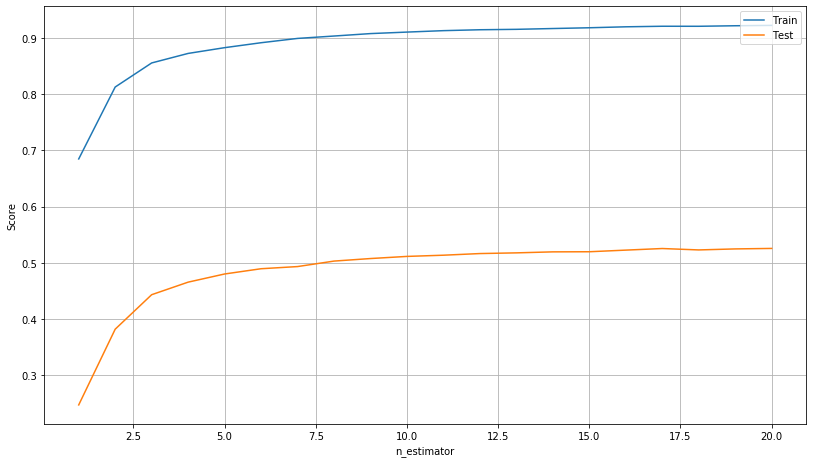

In [7]:
n_estimator = range(1, 21)
fig = plt.figure(figsize=[13.66,7.68])
plt.plot(n_estimator, train_score)
plt.plot(n_estimator, test_score)
plt.grid()
plt.legend(['Train','Test'], loc='upper right')
plt.xlabel('n_estimator')
plt.ylabel('Score')

In [8]:
train_score = []
test_score = []
for i in range(1,21):
    br = BaggingRegressor(max_samples=i, random_state=0)
    br.fit(X_train, y_train)
    train_score.append(br.score(X_train, y_train))
    test_score.append(br.score(X_test, y_test))
    print('Iteration ',i,' Completed')

Iteration  1  Completed
Iteration  2  Completed
Iteration  3  Completed
Iteration  4  Completed
Iteration  5  Completed
Iteration  6  Completed
Iteration  7  Completed
Iteration  8  Completed
Iteration  9  Completed
Iteration  10  Completed
Iteration  11  Completed
Iteration  12  Completed
Iteration  13  Completed
Iteration  14  Completed
Iteration  15  Completed
Iteration  16  Completed
Iteration  17  Completed
Iteration  18  Completed
Iteration  19  Completed
Iteration  20  Completed


Text(0, 0.5, 'Score')

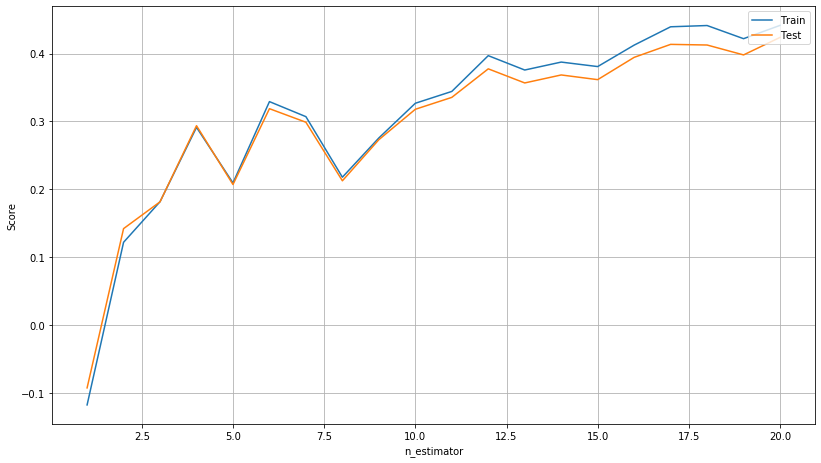

In [9]:
max_samples = range(1, 21)
fig = plt.figure(figsize=[13.66,7.68])
plt.plot(max_samples, train_score)
plt.plot(max_samples, test_score)
plt.grid()
plt.legend(['Train','Test'], loc='upper right')
plt.xlabel('n_estimator')
plt.ylabel('Score')

In [10]:
br = BaggingRegressor(n_estimators=12, max_samples=20, random_state=0)
br.fit(X_train, y_train)
print('Train Accuracy:',np.round(br.score(X_train, y_train), decimals=2)*100)
print('Test Accuracy:',np.round(br.score(X_test, y_test), decimals=2)*100)

Train Accuracy: 48.0
Test Accuracy: 47.0
